# 1. Data Ingestion Pipeline:

### Question A. Designing a data ingestion pipeline requires consideration of the data sources, storage mechanisms, and processing requirements. Here's a high-level design for a data ingestion pipeline that collects and stores data from various sources:

1. Identify Data Sources:
   - Databases: Determine which databases contain the relevant data and establish the connection details (e.g., host, port, credentials).
   - APIs: Identify the APIs from which data needs to be collected and understand their authentication and data retrieval mechanisms.
   - Streaming Platforms: Determine the streaming platforms (e.g., Apache Kafka, Amazon Kinesis) and configure their connection settings.

2. Extract Data:
   - Databases: Use appropriate techniques like SQL queries or ORM (Object-Relational Mapping) frameworks to extract data from databases.
   - APIs: Utilize API client libraries or frameworks to make requests to the APIs, authenticate if required, and retrieve the data.
   - Streaming Platforms: Set up consumers or subscribers to stream data from the chosen platform.

3. Transform and Cleanse:
   - Perform data transformations and cleansing operations specific to the requirements of your data processing. This may include data formatting, filtering, aggregating, or joining datasets.

4. Validate and Enrich:
   - Apply validation rules to ensure the integrity and quality of the ingested data. This can involve data type validation, range checks, or business rule validations.
   - Enrich the data by integrating additional information from external sources if needed.

5. Load into Storage:
   - Choose a suitable storage system based on your requirements, such as relational databases (e.g., MySQL, PostgreSQL), NoSQL databases (e.g., MongoDB, Cassandra), or cloud storage (e.g., Amazon S3, Google Cloud Storage).
   - Store the transformed and validated data in the selected storage system, following the appropriate schema and data model.

6. Schedule and Orchestrate:
   - Set up a scheduler or orchestration system (e.g., Apache Airflow, Kubernetes CronJobs) to automate the data ingestion pipeline at regular intervals or trigger it based on specific events.

### Question B. Implementing a real-time data ingestion pipeline for processing sensor data from IoT devices requires additional considerations for handling streaming data. Here's an outline of the pipeline:

1. Data Streaming:
   - Choose a scalable streaming platform like Apache Kafka, Apache Pulsar, or Amazon Kinesis.
   - Set up data producers on the IoT devices to publish sensor data to the streaming platform.

2. Stream Processing:
   - Develop stream processing applications using frameworks like Apache Flink, Apache Samza, or Apache Spark Streaming.
   - Configure the stream processing application to consume data from the streaming platform and perform real-time computations or transformations.

3. Data Transformation and Enrichment:
   - Apply necessary transformations and enrichment operations to the sensor data.
   - Cleanse the data by handling missing or erroneous values.

4. Data Storage:
   - Decide on the appropriate storage system based on your use case, such as time-series databases (e.g., InfluxDB, Prometheus) or data lakes (e.g., Hadoop Distributed File System, Amazon S3).
   - Store the processed sensor data in the chosen storage system for further analysis or retrieval.

5. Monitoring and Alerting:
   - Implement monitoring and alerting mechanisms to track the health and performance of the pipeline.
   - Set up alerts for any anomalies or errors encountered during data ingestion or processing.

### Question C. Developing a data ingestion pipeline that handles data from different file formats (CSV, JSON, etc.) and performs data validation and cleansing can be accomplished using the following steps:

1. File Ingestion:
   - Identify the file sources and define mechanisms to retrieve files, such as file system access or file upload interfaces.
   - Support various file formats by leveraging libraries or frameworks capable of parsing CSV, JSON, XML, or other formats.

2. Data Parsing and Validation:
   - Parse the files using appropriate parsers based on their formats (e.g., CSV parser, JSON parser).
   - Validate the data against predefined rules or schemas to ensure its correctness and adherence to data quality standards.
   - Perform data type validations, range checks, or pattern matching as required.

3. Data Transformation and Cleansing:
   - Apply transformations to convert the data into a consistent format or structure, conforming to your target data model.
   - Cleanse the data by handling missing or invalid values, outliers, or duplicates.
   - Optionally, perform data enrichment by integrating additional information from external sources.

4. Data Storage:
   - Choose a suitable storage system based on your requirements, such as databases or data lakes, similar to the previous examples.
   - Store the transformed and cleansed data in the chosen storage system, ensuring proper indexing and partitioning for efficient retrieval.

5. Workflow Orchestration:
   - Design a workflow or pipeline orchestration mechanism to manage the end-to-end data ingestion process, including scheduling, dependency management, and error handling.
   - Consider using workflow management tools like Apache Airflow, Luigi, or AWS Step Functions to coordinate the different stages of the pipeline.

In [ ]:
# Here's an example of how you can read CSV files and perform data validation and cleansing using Python's pandas library

import pandas as pd

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('your_csv_file.csv')

# Perform data validation and cleansing
# Example: Drop rows with missing values
data = data.dropna()

# Example: Convert column to a specific data type
data['column_name'] = pd.to_numeric(data['column_name'])

# Example: Apply a custom validation function
def validate_data(row):
    # Perform validation checks on each row
    
    # Check if column_name is a positive integer
    if not pd.notnull(row['column_name']):
        return False
    if not isinstance(row['column_name'], int) or row['column_name'] <= 0:
        return False
    
    # Check if date_column is a valid date
    if not pd.notnull(row['date_column']):
        return False
    try:
        pd.to_datetime(row['date_column'], format='%Y-%m-%d')
    except ValueError:
        return False
    
    # Add more validation rules as needed
    # ...
    return True

data = data[data.apply(validate_data, axis=1)]

# Store the processed data in a database or file

# Example: Store the DataFrame into a PostgreSQL database
import psycopg2

conn = psycopg2.connect(
    host="your_host",
    port="your_port",
    database="your_database",
    user="your_user",
    password="your_password"
)

data.to_sql('your_table', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

## 2. Model Training:
   ### Question A. Build a machine learning model to predict customer churn based on a given dataset. Train the model using appropriate algorithms and evaluate its performance.
   ### Question B. Develop a model training pipeline that incorporates feature engineering techniques such as one-hot encoding, feature scaling, and dimensionality reduction.

`Both Question are in the same churn prediction`

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
df = pd.read_csv("C:\Goku\Internship\Pre-Placements Ineuron\DataScience_ques\churn.csv", index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [30]:
#Looking for Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [31]:
# Looking for categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [32]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

In [34]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: Tenure, dtype: int64

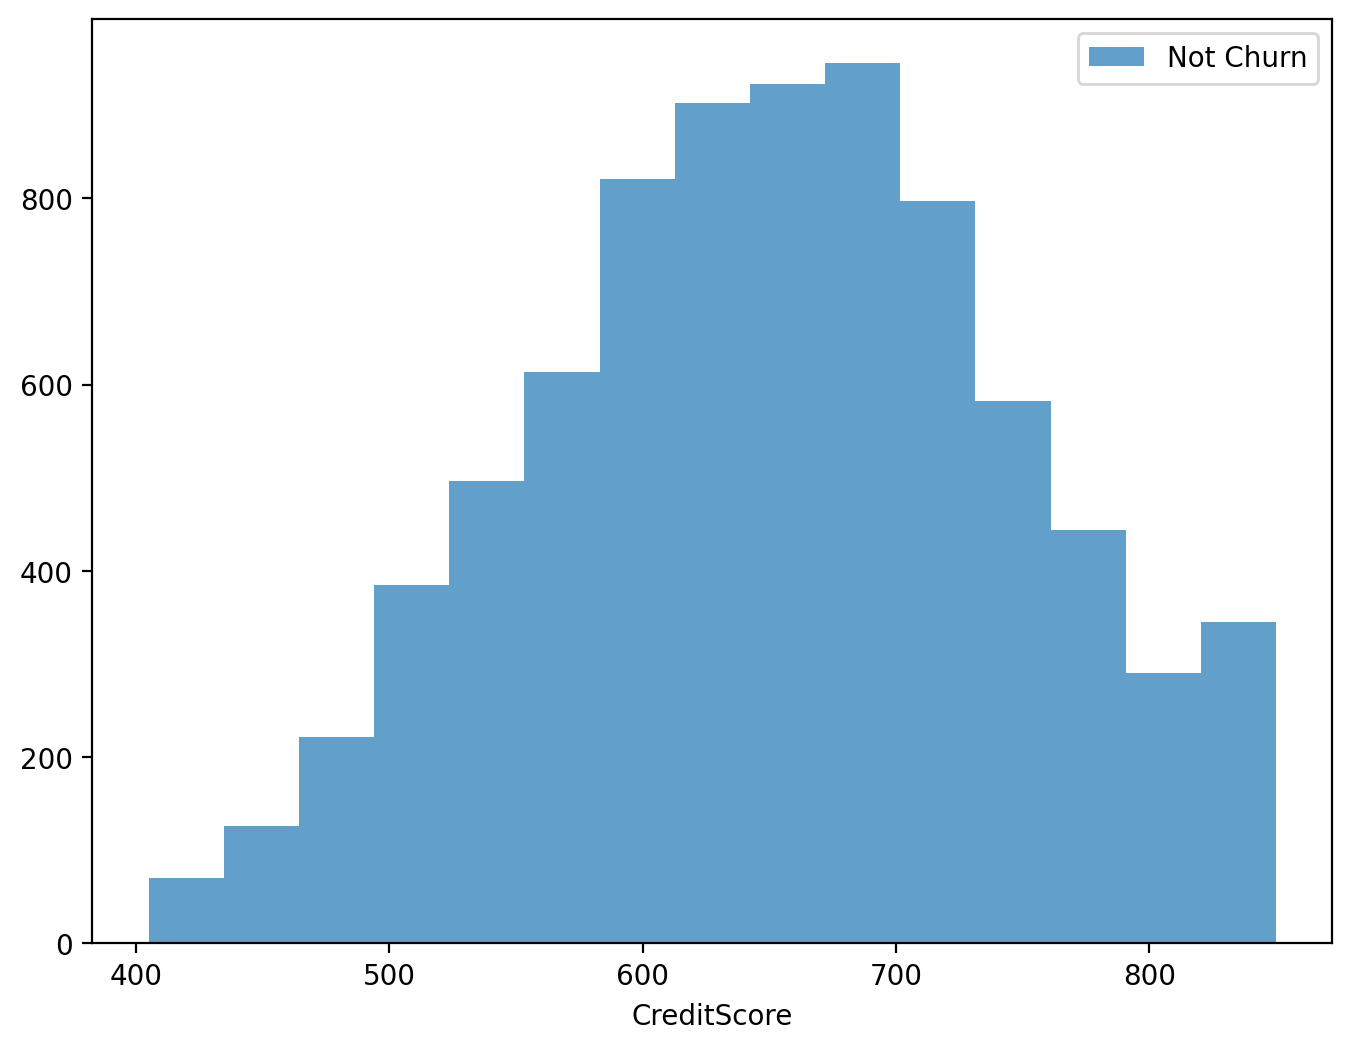

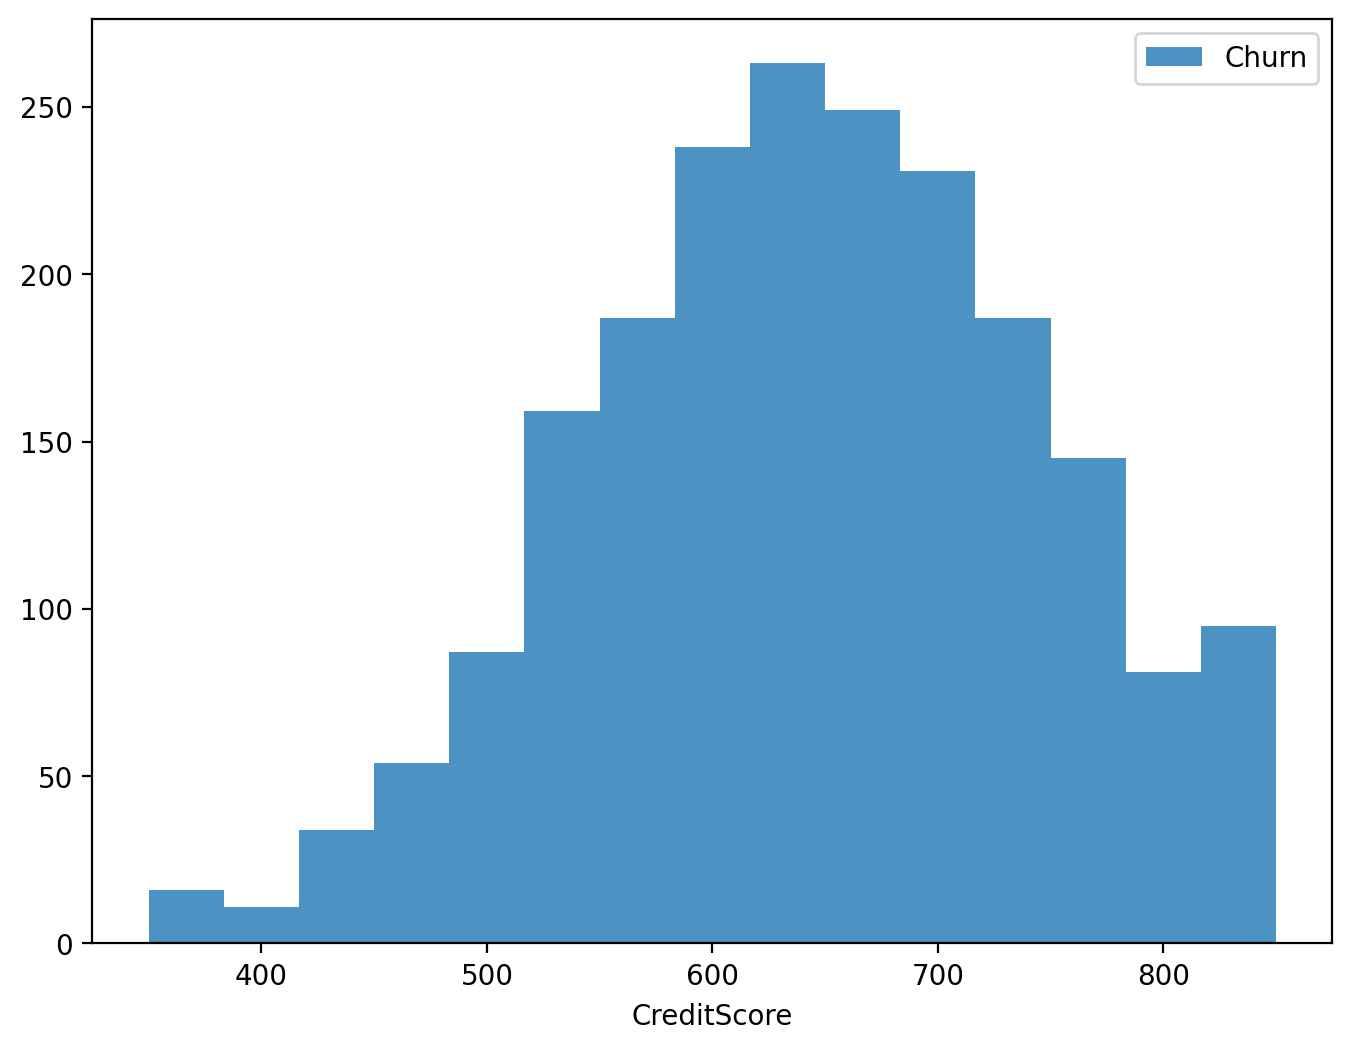

In [35]:
# distribution of the Credit Score for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

# distribution of the Credit Score for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(churn["CreditScore"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

<AxesSubplot:>

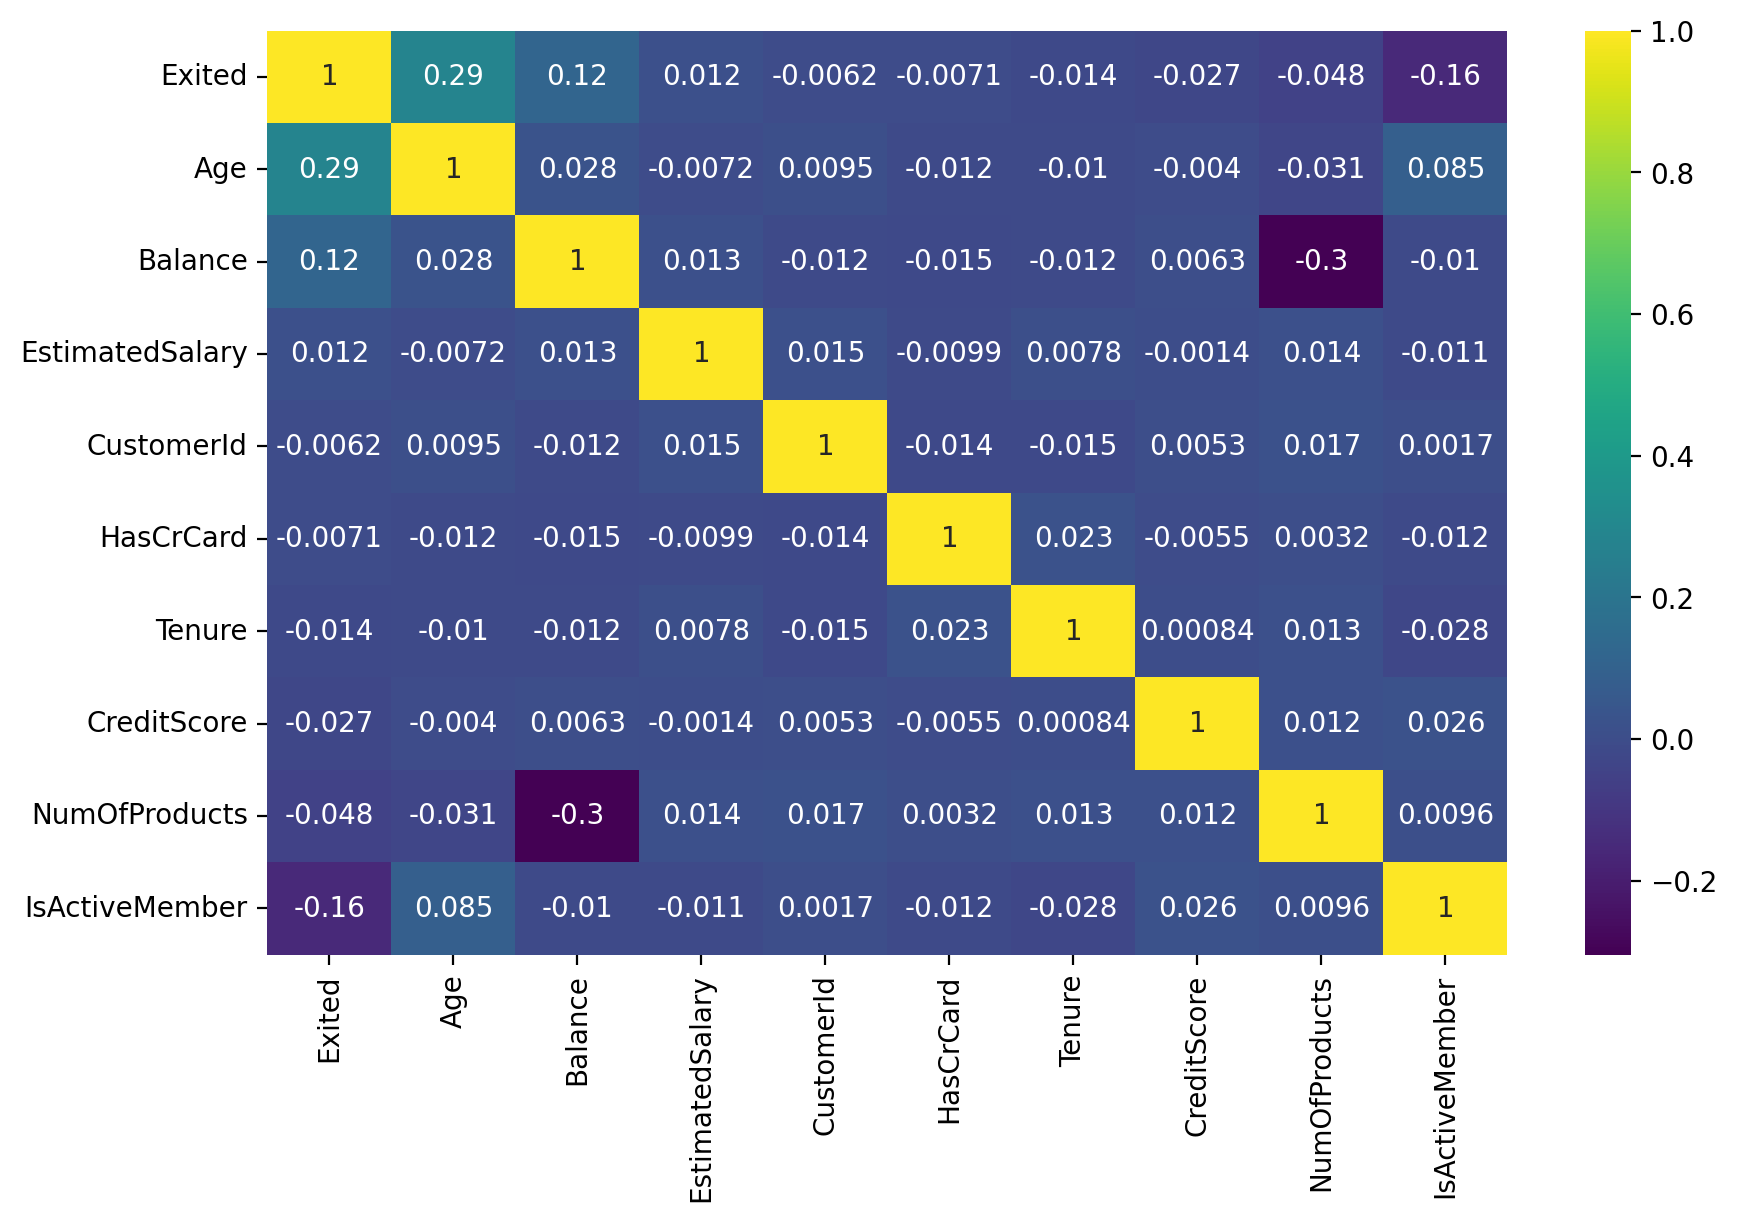

In [36]:
# Exited correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# 2- Data Preprocessing

In [37]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
    variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [38]:
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CreditScore has  [] Outliers
Age has  [] Outliers
Balance has  [] Outliers
EstimatedSalary has  [] Outliers


## One-Hot Encoding

In [39]:
list = ["Gender", "Geography"]
df = pd.get_dummies(df, columns =list, drop_first = True)

## Scalling

In [40]:
df = df.drop(["CustomerId","Surname"], axis = 1)

# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

new_cols_ohe = ["Gender_Male","Geography_Germany","Geography_Spain"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [41]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,
1,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,0,0,0
2,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,0,0,1
3,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0,0,0
4,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,0,0,0
5,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,0,0,1


In [42]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Models for Classification
models = [('LR', LogisticRegression(random_state=1)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=1)),
          ('RF', RandomForestClassifier(random_state=1)),
          ('SVR', SVC(gamma='auto',random_state=1)),
          ('GB', GradientBoostingClassifier(random_state = 1)),
          ("LightGBM", LGBMClassifier(random_state=1))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.809900 (0.008746)
KNN: 0.835300 (0.010345)
CART: 0.789500 (0.011783)
RF: 0.861900 (0.008960)
SVR: 0.857200 (0.008268)
GB: 0.864400 (0.009489)
LightGBM: 0.863900 (0.008142)


In [43]:
model_RF = RandomForestClassifier(random_state=1)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  192
True Negative :  1535
False Positive:  227
False Negative:  46


In [44]:
print(classification_report(model_RF.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1762
           1       0.46      0.81      0.58       238

    accuracy                           0.86      2000
   macro avg       0.71      0.84      0.75      2000
weighted avg       0.91      0.86      0.88      2000



### Question C. Train a deep learning model for image classification using transfer learning and fine-tuning techniques.

In [1]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
x  = '/kaggle/input/intel-image-classification/seg_train/seg_train'
path = Path(x)
path.ls()

[PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/street'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/sea'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/forest'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/glacier')]

In [3]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

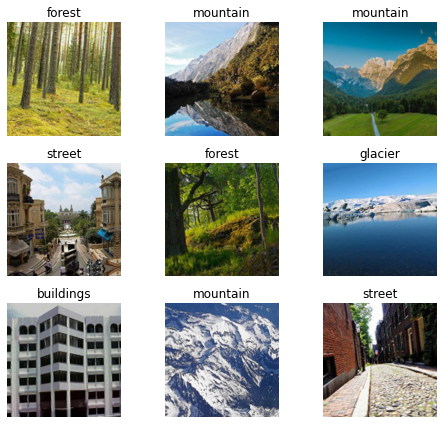

In [4]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [5]:
data

ImageDataBunch;

Train: LabelList (11228 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,mountain,mountain,mountain,mountain
Path: /kaggle/input/intel-image-classification/seg_train/seg_train;

Valid: LabelList (2806 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sea,mountain,mountain,mountain,mountain
Path: /kaggle/input/intel-image-classification/seg_train/seg_train;

Test: None

In [6]:
print(data.classes)
len(data.classes)
data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


6

In [7]:
model = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


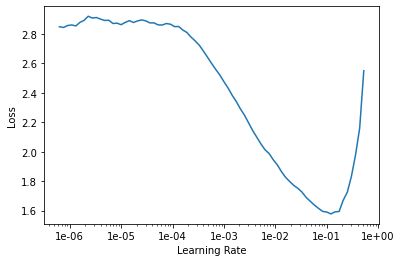

In [8]:
model.lr_find()
model.recorder.plot(suggestions=True)

In [9]:
lr1 = 1e-3
lr2 = 1e-1
model.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.405578,0.290146,0.901283,01:33
1,0.383602,0.299907,0.902708,01:29
2,0.336319,0.306456,0.911974,01:29
3,0.343718,0.326254,0.892374,01:30
4,0.364961,0.304092,0.906985,01:29
5,0.515605,0.546500,0.875624,01:30
6,0.622033,0.581009,0.892730,01:30
7,0.681928,0.578457,0.893443,01:30
8,1.094560,1.054756,0.897006,01:29
9,0.889135,1.874039,0.889522,01:30


#### Hyper Parameter Tuning


In [10]:
model.unfreeze()
model.fit_one_cycle(20,slice(1e-4,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.159835,0.224613,0.935495,01:29
1,0.180235,0.768976,0.919815,01:30
2,0.219724,0.273913,0.918746,01:31
3,0.214327,0.249109,0.926230,01:30
4,0.225790,1.400049,0.875267,01:31
5,0.208292,0.335781,0.908054,01:31
6,0.204567,0.318150,0.900570,01:31
7,0.182223,0.239845,0.919458,01:30
8,0.174720,0.263758,0.914469,01:31
9,0.139013,0.239959,0.928368,01:31


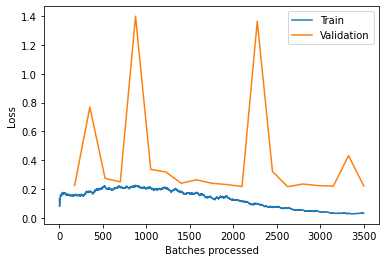

In [11]:
model.recorder.plot_losses()

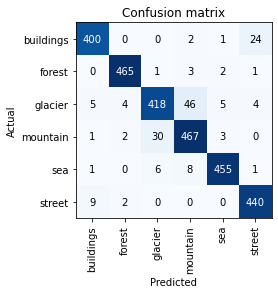

In [12]:
report = ClassificationInterpretation.from_learner(model)
report.plot_confusion_matrix()

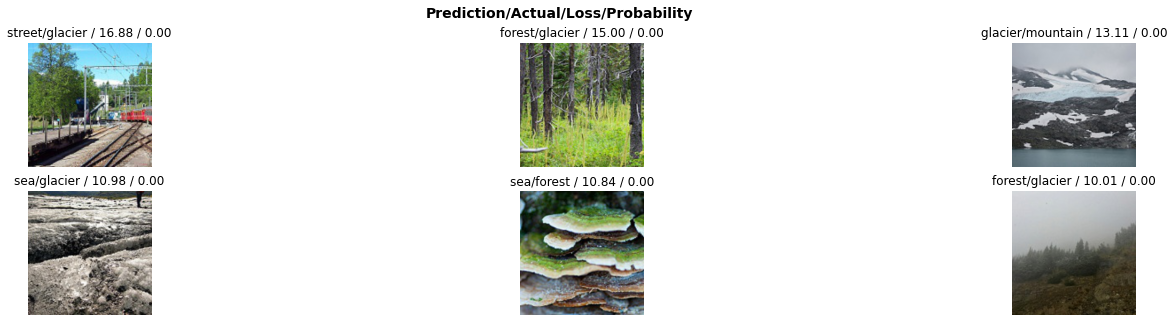

In [13]:
report.plot_top_losses(6,figsize = (25,5))